# Student Performance - Processing
Dataset of students performance in exams. \
Processing the average score of each student \
\
In this processing, we took the original database and averaged the scoring variables. We then create a categorization class according to the following logic:
class A - 80 to 100 \
class B - 50 to 79 \
class C - 0 to 49 

After classification, a label encoder was used to transform the classes into numerical values. In the attribute variables, we used One Hot Encoder, and in the numerical attribute of average score, we transformed the numbers into a 0-1 scale.



Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [128]:
#Importing dataset file
data_students = pd.read_csv('./data/StudentsPerformance.csv')

In [129]:
#Exploring dataset
data_students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [130]:
data_students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [131]:
data_students['average score'] = data_students[['math score', 'reading score', 'writing score']].mean(axis=1)


In this database we will be working with classification, so we have the following classes: A, B and C, which follow the respective average grade rule:

class A - 80 to 100
| class B - 50 to 79
| class C - 0 to 49

In [132]:
def classify(score):
    if score >= 80:
        return 'A'
    elif score >= 50:
        return 'B'
    else:
        return 'C'

# Aplicar a função
data_students['score class'] = data_students['average score'].apply(classify)

# Salvar o novo CSV (opcional)
data_students.to_csv('students_classificados.csv', index=False)

In [133]:
data_students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,score class
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,C
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,B
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,C


In [134]:
data_students = data_students.drop(columns='average score')

In [135]:
data_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score class
0,female,group B,bachelor's degree,standard,none,72,72,74,B
1,female,group C,some college,standard,completed,69,90,88,A
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,C
4,male,group C,some college,standard,none,76,78,75,B


In [160]:
data_students.to_csv('data/StudentsPerformance_processed.csv', index=False)

### Checking inconsistent values

In [136]:
# All columns have been checked
data_students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score class                    0
dtype: int64

### Exploring dataset

(array([699.,   0.,   0.,   0.,   0., 198.,   0.,   0.,   0., 103.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

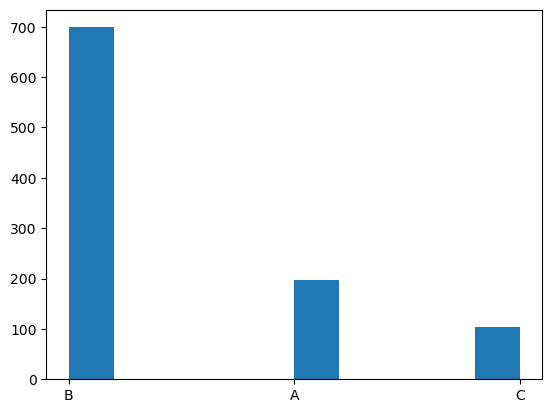

In [137]:
#Approximate score
plt.hist(x = data_students['score class'])

In [138]:
graphic = px.treemap(data_students, path = ['score class', 'gender', 'parental level of education', 'race/ethnicity'])
graphic.show()

### Predictor division and class

In [141]:
#Separing predictors and ignoring math score, reading score and writing score columns
X_students = data_students.iloc[:, 0:8].values

In [142]:
X_students

array([['female', 'group B', "bachelor's degree", ..., 72, 72, 74],
       ['female', 'group C', 'some college', ..., 69, 90, 88],
       ['female', 'group B', "master's degree", ..., 90, 95, 93],
       ...,
       ['female', 'group C', 'high school', ..., 59, 71, 65],
       ['female', 'group D', 'some college', ..., 68, 78, 77],
       ['female', 'group D', 'some college', ..., 77, 86, 86]],
      dtype=object)

In [143]:
# Average score is the target class
Y_students = data_students.iloc[:, 8].values

In [144]:
Y_students

array(['B', 'A', 'A', 'C', 'B', 'B', 'A', 'C', 'B', 'C', 'B', 'C', 'B',
       'B', 'B', 'B', 'A', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B',
       'C', 'A', 'A', 'C', 'A', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'B',
       'B', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'C', 'B',
       'B', 'B', 'C', 'C', 'B', 'B', 'C', 'B', 'A', 'B', 'B', 'A', 'B',
       'C', 'B', 'C', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A',
       'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B',
       'A', 'C', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'B', 'C', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'B', 'B', 'A', 'B

### Treatment of categorical attributes

#### Label Encoder
Applying label encoder on target class

In [145]:
from sklearn.preprocessing import LabelEncoder

label_encoder_class_score = LabelEncoder()

In [146]:
Y_students = label_encoder_class_score.fit_transform(Y_students)

In [147]:
Y_students

array([1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0,

#### OneHot Encoder
Applying OHE on entry values

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [150]:
# Transforming categorical variables in dummy variables
categorical_cols = [0, 1, 2, 3, 4]
numerical_cols = [5, 6, 7]

onehotencoder_students = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
        ],
    )


In [151]:
X_students = onehotencoder_students.fit_transform(data_students.iloc[:, 0:8])

In [152]:
X_students

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

### Dividing the training and testing bases

Separating 15% of the base for testing

In [70]:
from sklearn.model_selection import train_test_split

In [153]:
X_students_train, X_students_test, Y_students_train, Y_students_test = train_test_split(X_students, Y_students, test_size = 0.15, random_state = 0)

In [154]:
X_students_train.shape, Y_students_train.shape

((850, 20), (850,))

In [155]:
X_students_test.shape, Y_students.shape

((150, 20), (1000,))

### Saving processed variables

In [156]:
import pickle

with open('students_performance.pkl', mode = 'wb') as f:
    pickle.dump((X_students_train, Y_students_train, X_students_test, Y_students_test), f)